In [143]:
import numpy as np
import pandas as pd

In [144]:
#데이터 불러오기
df = pd.read_csv("C:/Users/고유경/Desktop/대외활동/투빅스/강의자료/2주차/new1_13기_2주차_LR_ 수정본/assignment1/sampled_data.csv")

In [145]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0


맨 오른쪽 열 Class는 y

In [146]:
#X,y 구분해서 데이터 나눠주기
df_X = df.iloc[:, :-1] #마지막 열 class 제외 나머지 모든 열
df_y = df.iloc[:, -1] #마지막 열 class

In [147]:
#sklearn에서 필요한 모듈들 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [148]:
#train, test 데이터 나눠주기
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state = 0)

In [149]:
#각각 행, 열 개수 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [150]:
#X_train 스케일링 해주기
scaler = StandardScaler() 
scaler.fit_transform(X_train)
scaler.transform(X_train)

array([[-1.14108787,  0.58692535, -0.96859154, ...,  0.10758963,
         0.15818377,  0.29765166],
       [ 1.45624903,  1.08104822,  0.06234035, ..., -0.01913339,
        -0.18118879, -0.36883746],
       [ 0.75833894,  0.95436709, -0.60243691, ...,  0.28458186,
        -0.08727433, -0.10139278],
       ...,
       [-1.17848378, -0.39306929,  0.3675534 , ..., -0.29358649,
        -0.26392097, -0.06106382],
       [ 1.56942307, -0.22082572,  0.14591662, ...,  0.0765422 ,
        -0.00476937, -0.28817954],
       [ 1.57928619,  0.98278649, -0.10310982, ..., -0.1759003 ,
        -0.0853167 , -0.15891461]])

## 로지스틱회귀 진행

In [151]:
# 로지스틱회귀 함수를 classifier로 지정
classifier = LogisticRegression()
# train 데이터에 classifier fit해주기
classifier.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
# test데이터로 class 예측(Predict the labels of the test set: y_pred)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
#precision,recall,f1score까지 한번에 보여주는 함수 classification_report 사용
repor = classification_report(y_test,y_pred, output_dict=True)
repor_df = pd.DataFrame(repor).transpose() #그냥 띄우면 엉망이길래 output_dict와 함께 추가한 코드입니다
print(repor_df)


              precision    recall  f1-score      support
0              0.999719  0.999578  0.999648  7111.000000
1              0.700000  0.777778  0.736842     9.000000
accuracy       0.999298  0.999298  0.999298     0.999298
macro avg      0.849859  0.888678  0.868245  7120.000000
weighted avg   0.999340  0.999298  0.999316  7120.000000


In [154]:
#class를 각각 0과 1로 예측할 확률
classifier.predict_proba(X_test)

array([[9.98256627e-01, 1.74337267e-03],
       [9.99989859e-01, 1.01413502e-05],
       [9.99999586e-01, 4.13589565e-07],
       ...,
       [9.76053128e-01, 2.39468725e-02],
       [9.99995499e-01, 4.50094958e-06],
       [9.99996086e-01, 3.91433992e-06]])

In [155]:
#1로 예측할 확률을 pred로 지정해둠
pred = classifier.predict_proba(X_test)[:,1]

In [156]:
pred

array([1.74337267e-03, 1.01413502e-05, 4.13589565e-07, ...,
       2.39468725e-02, 4.50094958e-06, 3.91433992e-06])

## Accuracy

In [126]:
#mean accuracy 구하기
classifier.score(X_test, y_test)

0.9992977528089888

상당히 높다...

In [158]:
# f1 score도 구해보기
f1_score(y_test, y_pred)

0.7368421052631577

In [157]:
#confusion matrix 구하기
confusion_matrix(y_test, y_pred)

array([[7108,    3],
       [   2,    7]], dtype=int64)

왼쪽 위(0,0): TN(True Negative), (0,1): FP(False Positive)

(1,0): FN(False Negative), (1,1): TP(True Positive)


In [159]:
recall_score(y_test, y_pred)

0.7777777777777778

mean accuracy보다 낮고 f1 score과 비슷하다

## ROC Curve를 이용하여 최적의 cutoff value 찾기

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, pred) #pred는 1로 예측할 확률
#thresholds가 cutoff value

In [161]:
#auc 면적 구하기
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.995125


거의 1에 가까운 높은 값

In [162]:
#그래프를 그려보자
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Logistic Regression ROC Curve')

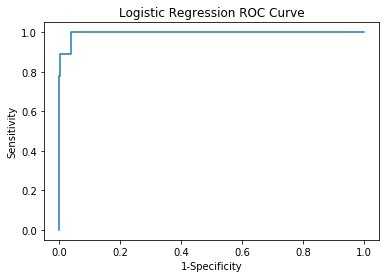

In [164]:
#roc curve 그래프 그리기
x = fpr #(1 - Specificity : 1 - TN/FP+TN)
y = tpr #(Sensitivity : recall 값임, TP/TP+FN)

plt.plot(x,y)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Logistic Regression ROC Curve')

In [165]:
#최적의 cutoff value는 fpr - tpr에 절대값 씌운 값이 최대인 지점에서의 thresholds값이다
res = [[abs(fpr_i - tpr_i), thres_i] for fpr_i, tpr_i, thres_i in zip(fpr, tpr, thresholds)]
max(res)

[0.9606243847560119, 0.017215834379928307]

최적의 cutoff value는  0.017215834379928307

이친구로 다시 예측을 진행해본다

## 조정한 cutoff value로 다시 예측진행, 성능평가

In [166]:
#예측확률이 0.017215834379928307보다 클 경우 1, 작을 경우 0을 반환하는 confusion matrix 구현
confusion_matrix(y_test,pred > 0.017215834379928307)

array([[6831,  280],
       [   1,    8]], dtype=int64)

In [167]:
#auc 면적 구해보기
roc_auc_score(y_test,pred > 0.017215834379928307)

0.9247566368224504

얘는 오히려 기존값인 0.995125보다 감소

In [168]:
recall_score(y_test,pred > 0.017215834379928307)

0.8888888888888888

recall은 0.7777777777777778보다 상승

In [169]:
f1_score(y_test, pred > 0.017215834379928307) 

0.05387205387205387

f1 score은 0.7368421052631577보다 감소